#### MALDI-TOF ANALISIS CLP
##### 6) s_m43_d24_top15

##### s: Supervisado
##### m43:  Utiliza 43 muestras
##### d24: Utiliza los días 2 y 4

##### Autor: Bioing. Facundo Urteaga (IBB-CONICET)

In [2]:
# Carga de Librerías

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import datasets, neighbors
from mlxtend.plotting import plot_decision_regions
import seaborn as sns
from sklearn.linear_model import LogisticRegression  # Modelo de regresión logística

In [3]:
# Carga de datos

df_top30_107_d24 = pd.read_csv('Data/top30_107_d24.csv')
df_top30_107_dico_d24 = pd.read_csv('Data/top30_107_dico_d24.csv')
metadata_107 = pd.read_csv('Data/metadata_107.csv')

In [4]:
df_top30_107_d24["etiqueta"] = metadata_107["factor1"]
df_top30_107_dico_d24["etiqueta"] = metadata_107["factor1"]

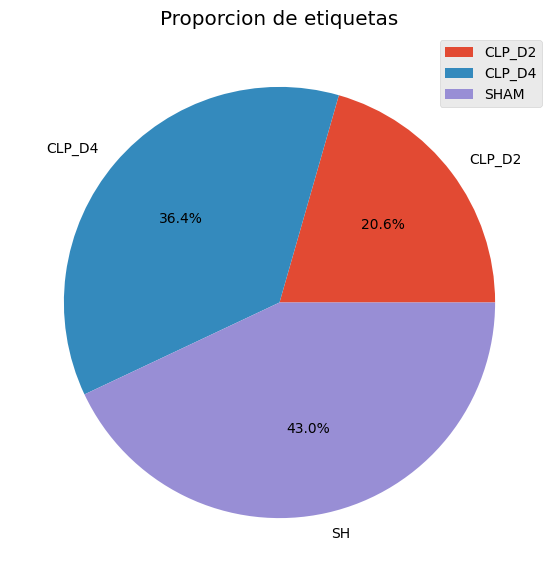

etiqueta
SH        46
CLP_D4    39
CLP_D2    22
Name: count, dtype: int64


In [5]:
# Proporción de las variables objetivo

plt.figure(figsize=(7,7))

labels, counts = np.unique(df_top30_107_d24.etiqueta, return_counts=True)
plt.pie(counts, autopct='%1.1f%%',labels=labels)
plt.legend({'CLP_D4','CLP_D2','SHAM'})
plt.title('Proporcion de etiquetas')

plt.show()

print(df_top30_107_d24.etiqueta.value_counts())

1) Regresión Logística

In [6]:
X = df_top30_107_d24.iloc[:,1:31]
y = df_top30_107_d24.iloc[:,31]

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_normalizado = scaler.fit_transform(X) # Se puede probar otra normalización
X_normalizado = pd.DataFrame(X_normalizado, columns=X.columns)

In [7]:
X_normalizado

,5083.69393588192,5123.17084416279,2176.0757718048,3522.69397347764,3965.90633637679,4755.48048179512,8292.93217095009,3806.08038221564,3548.27908349805,3759.25377510002,...,3495.83242709301,8046.64897786137,5281.56366703373,9070.0335692382,2897.41742173565,2541.30951480857,4686.44425002974,3111.36363777591,3738.98431058113,18114.8994390687
0,0.083461,0.056534,0.150404,0.066141,0.093784,0.027562,0.173978,0.051868,0.059955,0.202315,...,0.060856,0.349973,0.022935,0.866295,0.150650,0.026439,0.039034,0.065411,0.117485,0.757809
1,0.119021,0.094042,0.217257,0.091415,0.114128,0.021431,0.177988,0.069708,0.086551,0.286693,...,0.087302,0.367242,0.031077,0.930014,0.168953,0.056849,0.055059,0.089411,0.161642,0.765367
2,0.101935,0.074553,0.164766,0.071172,0.110373,0.021370,0.171544,0.059270,0.063326,0.207890,...,0.068614,0.325198,0.034405,0.930727,0.143122,0.040004,0.034186,0.074956,0.137623,0.734520
3,0.144422,0.085458,0.140017,0.025340,0.309998,0.070288,0.015460,0.100250,0.099551,0.276141,...,0.171469,0.217412,0.095961,0.057410,0.078661,0.018052,0.137618,0.068745,0.222421,0.139203
4,0.184012,0.107669,0.155721,0.053319,0.463097,0.069502,0.017959,0.123316,0.054442,0.311042,...,0.239369,0.258191,0.128918,0.053903,0.099788,0.013441,0.163547,0.053699,0.269689,0.170173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,0.013407,0.034128,0.025035,0.049126,0.103144,0.531327,0.281857,0.031372,0.011134,0.180599,...,0.091978,0.189141,0.045774,0.062671,0.012955,0.512264,0.085533,0.255829,0.211228,0.195303
103,0.010902,0.012202,0.012727,0.042190,0.000000,0.491579,0.307550,0.034676,0.026652,0.168034,...,0.086437,0.344209,0.035874,0.124484,0.002193,0.488790,0.188439,0.174046,0.141296,0.254277
104,0.028475,0.052340,0.000000,0.039875,0.148868,0.946408,0.522924,0.002620,0.021677,0.054192,...,0.069390,0.464498,0.043590,0.204206,0.008846,0.498393,0.109508,0.371223,0.089768,0.105849
105,0.026946,0.045704,0.011402,0.034872,0.110631,0.660243,0.335193,0.006995,0.004475,0.019486,...,0.035345,0.446126,0.036633,0.203809,0.005704,0.241488,0.075980,0.213721,0.035437,0.128959


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_normalizado, y, test_size=0.4, random_state=42)
print(f"""X_train: {X_train.shape}
y_train: {y_train.shape}

X_test: {X_test.shape}
y_test: {y_test.shape}""")

X_train: (64, 30)
y_train: (64,)

X_test: (43, 30)
y_test: (43,)


In [45]:
# Instanciamos y ajustamos el modelo de regresión logística
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, y_train)

LogisticRegression()

In [46]:
pred = logistic_reg.predict(X_test)

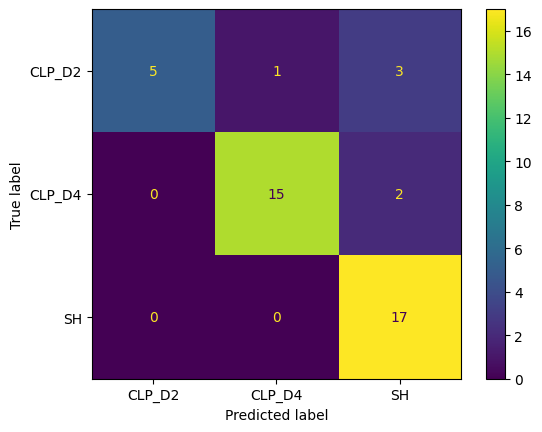

86.04651162790698


In [47]:
# Evaluación del modelo

# ignorar las advertencias de FutureWarning.
import warnings; warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, pred, labels=logistic_reg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=logistic_reg.classes_)
disp.plot()
plt.show()

print(accuracy_score(y_test,pred)*100)

2) Random Forest

In [48]:
# Bosque aleatorio
from sklearn.ensemble import RandomForestClassifier

# Instancia del modelo
rfc_clp = RandomForestClassifier(random_state=42)

# Optimizacion de parametros
from sklearn.model_selection import GridSearchCV

# Definir los hiperparámetros y sus posibles valores
param_grid = {
    'n_estimators': [10,25,50],
    'max_depth' : [5,10,15],
    'criterion' : ['mse', 'mae', 'gini', 'entropy', 'log_loss'],
    'min_samples_split': [2,4,6],
    'min_samples_leaf': [1,2,4],
}

In [49]:
# Crear el objeto GridSearchCV
grid_search = GridSearchCV(estimator=rfc_clp, param_grid=param_grid, cv=5, scoring='accuracy')

# Ajustar el modelo con GridSearchCV
grid_search.fit(X_train, y_train)

# Obtener el modelo con el mejor rendimiento
best_model_clp = grid_search.best_estimator_

# 1m 10s

C:\Users\Facundo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
810 fits failed out of a total of 2025.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
405 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Facundo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Facundo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\

In [50]:
# Mejores parametros del modelo
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 10}

In [51]:
from sklearn.metrics import accuracy_score, classification_report
y_train_pred_clp = best_model_clp.predict(X_train)
y_test_pred_clp = best_model_clp.predict(X_test)

accuracy_train_clp = accuracy_score(y_train,y_train_pred_clp)
accuracy_test_clp = accuracy_score(y_test,y_test_pred_clp)

In [52]:
print(accuracy_train_clp)
print(accuracy_test_clp)

0.9375
0.7441860465116279


In [53]:
print(classification_report(y_test, y_test_pred_clp))

              precision    recall  f1-score   support

      CLP_D2       0.50      0.33      0.40         9
      CLP_D4       0.87      0.76      0.81        17
          SH       0.73      0.94      0.82        17

    accuracy                           0.74        43
   macro avg       0.70      0.68      0.68        43
weighted avg       0.73      0.74      0.73        43



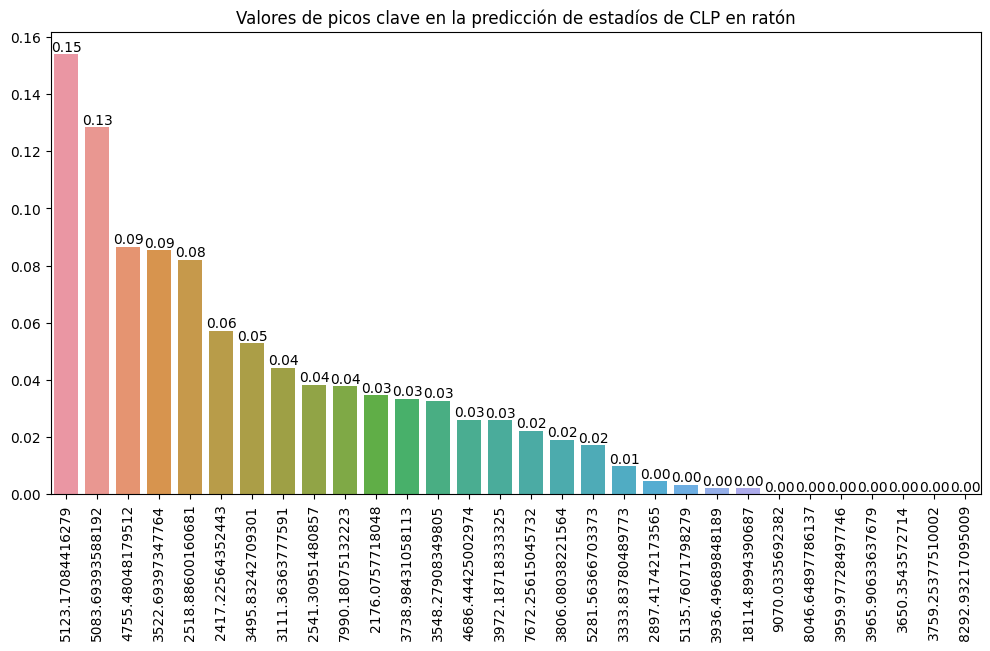

,0
5123.17084416279,0.153964
5083.69393588192,0.128495
4755.48048179512,0.086548
3522.69397347764,0.085405
2518.88600160681,0.082109
2417.22564352443,0.057168
3495.83242709301,0.052924
3111.36363777591,0.044238
2541.30951480857,0.038264
7990.18075132223,0.037781


In [55]:
# Análisis de importancia de los picos

feature_scores_clp = pd.DataFrame(pd.Series(best_model_clp.feature_importances_, index=X_train.columns).sort_values(ascending=False)).T
plt.figure(figsize=(12,6))
sns.barplot(data=feature_scores_clp)

for index, value in enumerate(feature_scores_clp.values.flatten()):
    plt.annotate(f'{value:.2f}', xy=(index, value), ha='center', va='bottom')


plt.title("Valores de picos clave en la predicción de estadíos de CLP en ratón")
plt.xticks(rotation=90)
plt.show()
pd.DataFrame(feature_scores_clp).T

In [56]:
# Validación Cruzada

from sklearn.model_selection import cross_val_score, KFold

k = 5
cv = KFold(n_splits=k, shuffle=True, random_state=42)

scores = cross_val_score(best_model_clp, X_train, y_train, cv=cv, scoring='accuracy')
print("")
print("Accuracy scores for each fold:", scores*100)
print("Mean accuracy: ", scores.mean()*100)
print("Standard deviation: ", scores.std()*100)



Accuracy scores for each fold: [ 76.92307692  38.46153846  84.61538462  61.53846154 100.        ]
Mean accuracy:  72.3076923076923
Standard deviation:  20.981817995362853


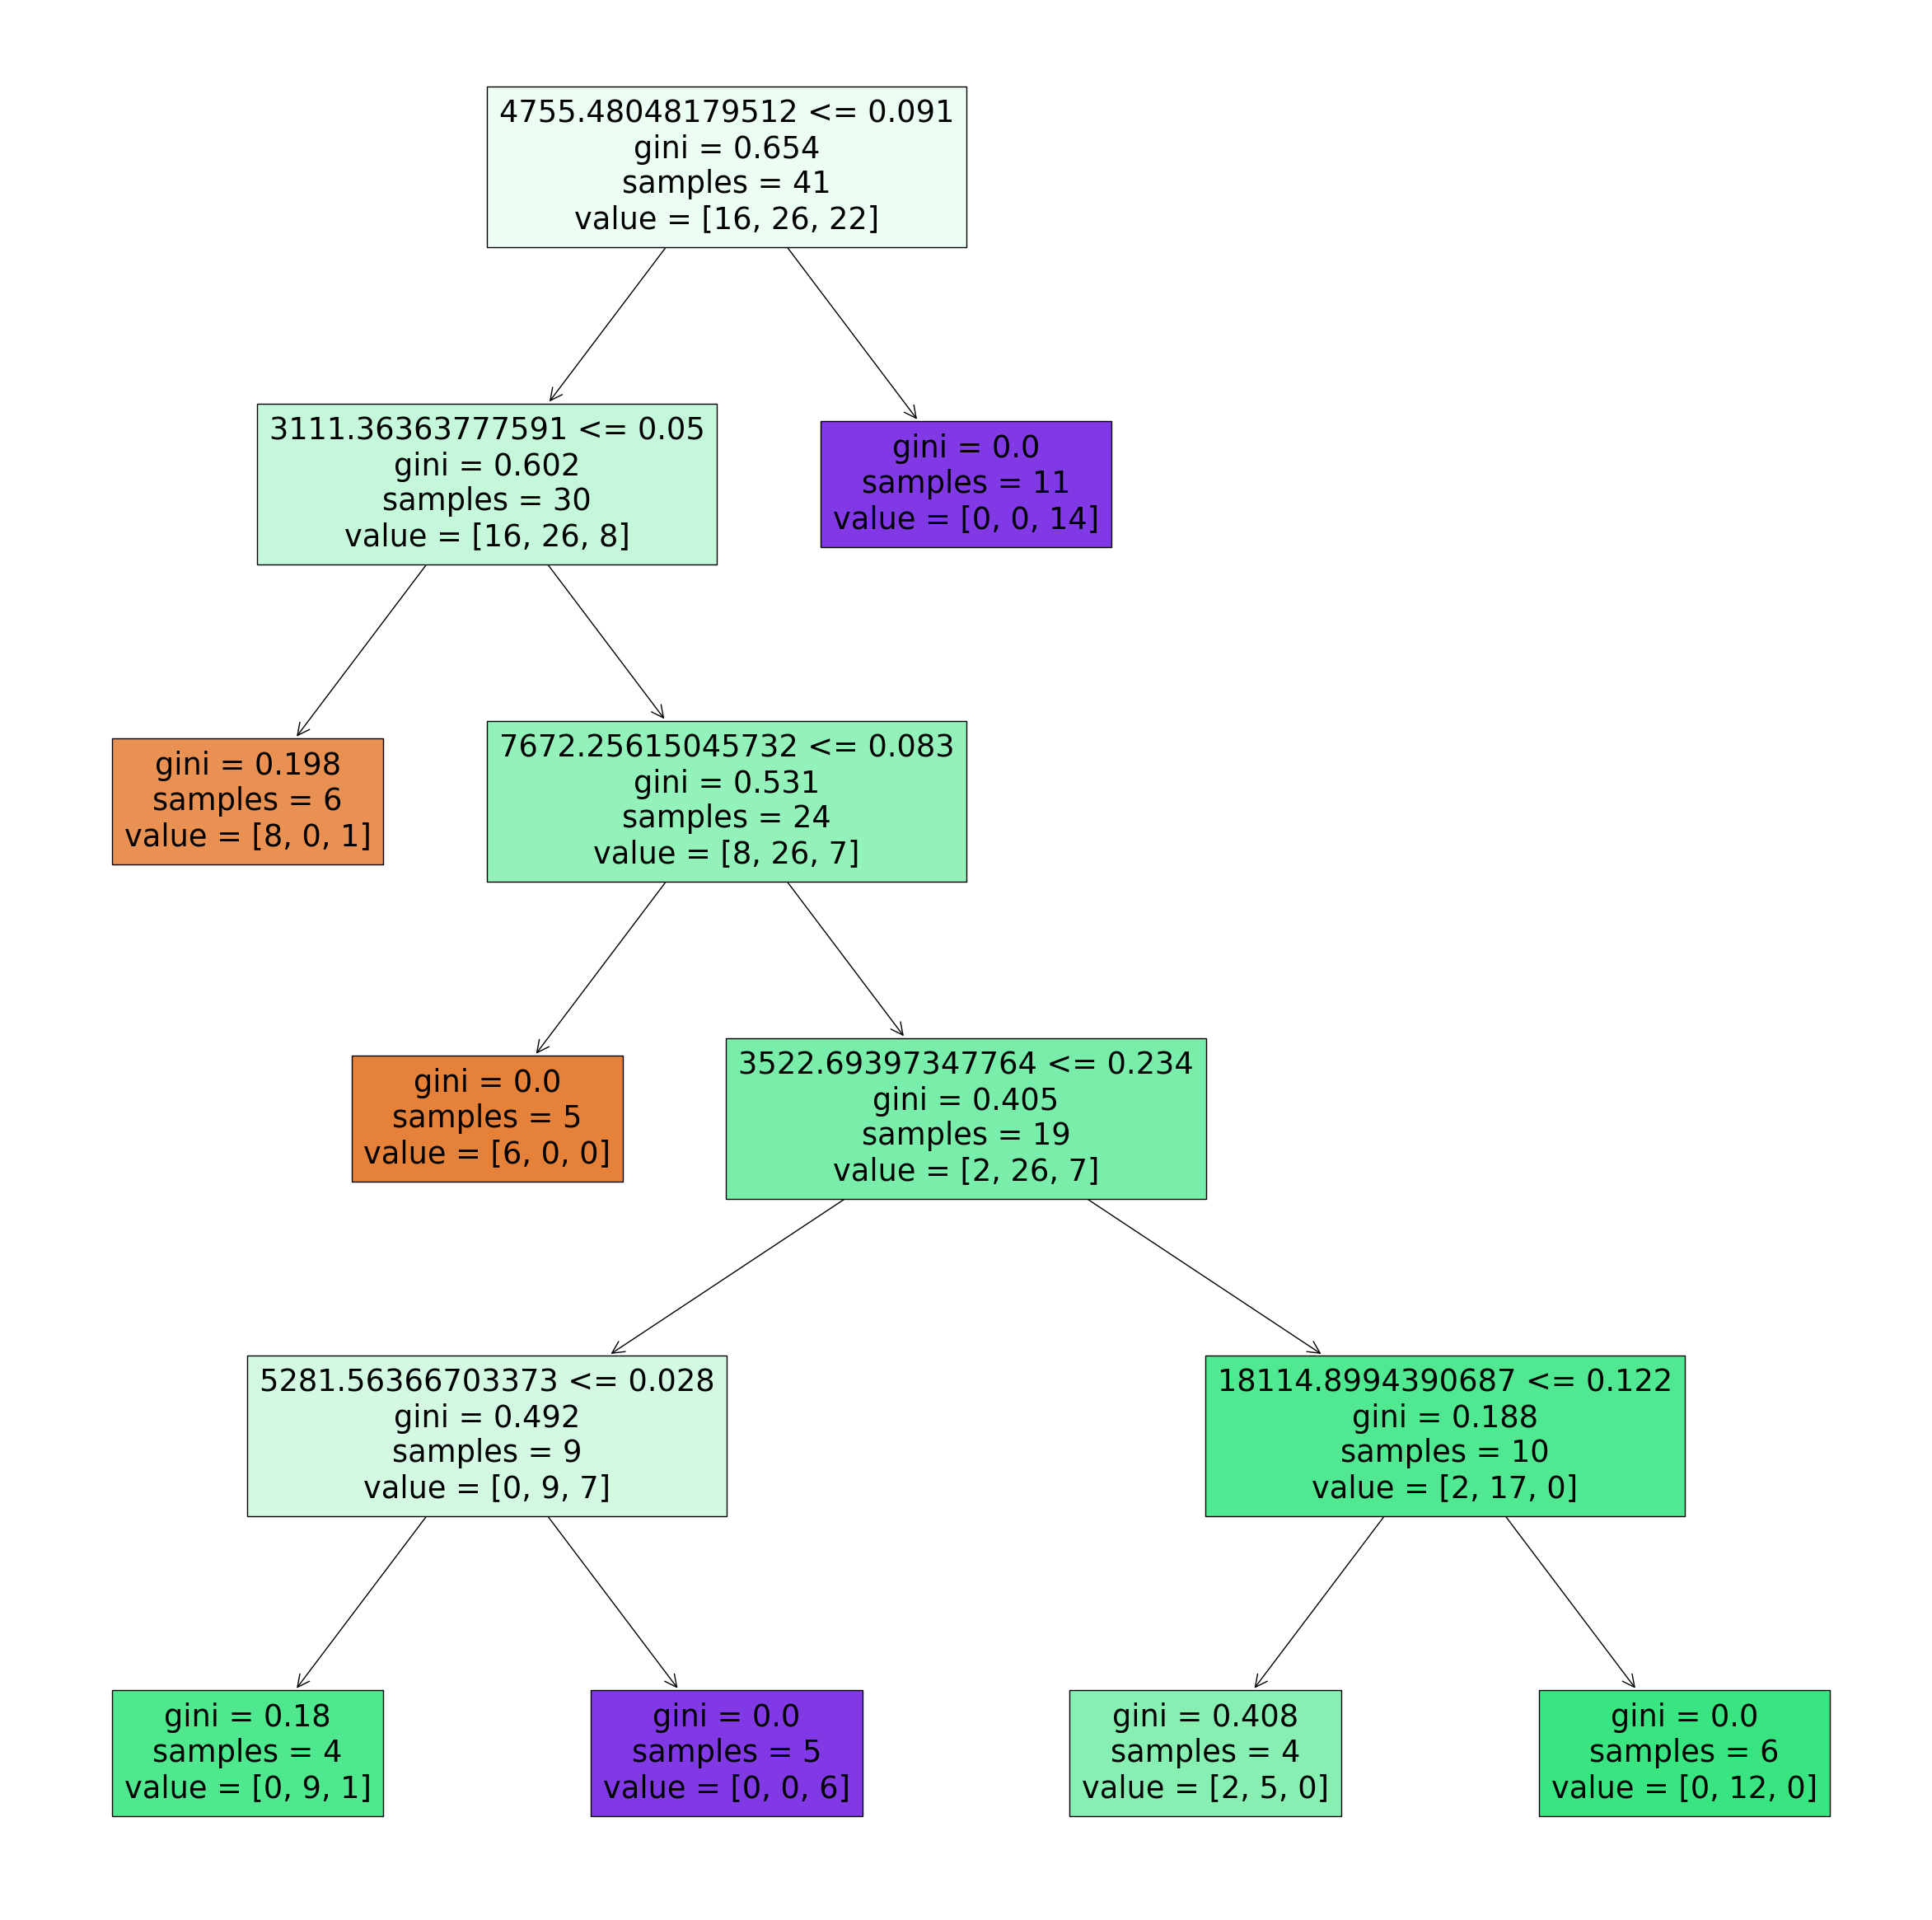

In [57]:
# Visualización

from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(30, 30))

# Obtener un árbol aleatorio del Random Forest
tree_index = 0  # Índice del árbol deseado
Tree = best_model_clp.estimators_[tree_index]

# Visualizar el árbol utilizando plot_tree
tree.plot_tree(Tree, feature_names=X_train.columns, filled=True)
plt.show()

3. Support Vector Machine (SVM)

In [1]:
# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

# Preprocesado y modelado
# ==============================================================================
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [9]:
# Creación de modelo SVM lineal
# ==============================================================================
modelo = SVC(C = 100, kernel = 'linear', random_state=123)
modelo.fit(X_train, y_train)

SVC(C=100, kernel='linear', random_state=123)

In [10]:
# Predicciones test
# ==============================================================================
predicciones = modelo.predict(X_test)
predicciones

array(['SH', 'SH', 'CLP_D2', 'SH', 'SH', 'SH', 'SH', 'CLP_D4', 'SH', 'SH',
       'SH', 'CLP_D4', 'CLP_D2', 'SH', 'CLP_D2', 'SH', 'CLP_D4', 'SH',
       'SH', 'CLP_D4', 'SH', 'CLP_D2', 'SH', 'CLP_D4', 'CLP_D4', 'SH',
       'CLP_D4', 'SH', 'CLP_D2', 'CLP_D4', 'CLP_D4', 'CLP_D4', 'CLP_D2',
       'CLP_D4', 'SH', 'SH', 'SH', 'CLP_D4', 'CLP_D2', 'CLP_D4', 'SH',
       'CLP_D4', 'SH'], dtype=object)

In [11]:
# Accuracy de test del modelo 
# ==============================================================================
accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = predicciones,
            normalize = True
           )
print("")
print(f"El accuracy de test es: {100*accuracy}%")


El accuracy de test es: 76.74418604651163%


In [12]:
# SVM Radial
# Grid de hiperparámetros
# ==============================================================================
param_grid = {'C': np.logspace(-5, 7, 20)}

# Búsqueda por validación cruzada
# ==============================================================================
grid = GridSearchCV(
        estimator  = SVC(kernel= "rbf", gamma='scale'),
        param_grid = param_grid,
        scoring    = 'accuracy',
        n_jobs     = -1,
        cv         = 3, 
        verbose    = 0,
        return_train_score = True
      )

# Se asigna el resultado a _ para que no se imprima por pantalla
_ = grid.fit(X = X_train, y = y_train)

# Resultados del grid
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False) \
    .head(5)

,param_C,mean_test_score,std_test_score,mean_train_score,std_train_score
10,20.691381,0.936508,0.059391,1.0,0.0
11,88.586679,0.936508,0.059391,1.0,0.0
18,2335721.46909,0.936508,0.059391,1.0,0.0
17,545559.478117,0.936508,0.059391,1.0,0.0
16,127427.49857,0.936508,0.059391,1.0,0.0


In [13]:
# Mejores hiperparámetros por validación cruzada
# ==============================================================================
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

modelo = grid.best_estimator_

----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'C': 20.6913808111479} : 0.9365079365079364 accuracy


In [14]:
# Predicciones test
# ==============================================================================
predicciones = modelo.predict(X_test)

In [15]:
# Accuracy de test del modelo 
# ==============================================================================
accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = predicciones,
            normalize = True
           )
print("")
print(f"El accuracy de test es: {100*accuracy}%")


El accuracy de test es: 83.72093023255815%


In [16]:
# Matriz de confusión de las predicciones de test
# ==============================================================================
confusion_matrix = pd.crosstab(
    y_test.ravel(),
    predicciones,
    rownames=['Real'],
    colnames=['Predicción']
)
confusion_matrix

Predicción,CLP_D2,CLP_D4,SH
Real,,,
CLP_D2,5,1,3
CLP_D4,0,14,3
SH,0,0,17


4. kNN